# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and humidity. However, when it approaches the equator, there are more cities with 0% of humidity.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0 and 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 30 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/forecast?"+ "&APPID=" + api_key+"&units=imperial"

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_number=1
set_number=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind=[]

for city in cities:
    query_url=base_url+"&q=" + city 
    weather_json=requests.get(query_url).json()
    
    try:
        city_name.append(city)
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        wind.append(weather_json["list"][0]["wind"]["speed"])
        print(f"Processing Record {city_number} of Set {set_number} | {city}")
        print(query_url)
    
        if city_number>=49:
            set_number+=1
            city_number=1
        else:
            city_number+=1
    
    except (KeyError):
        print("City not found. Skipping...")
        city_name.remove(city)
                    
print(f"-----------------------------")
print("Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=ushuaia
Processing Record 2 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=saskylakh
Processing Record 3 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=port alfred
Processing Record 4 of Set 1 | rocha
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=rocha
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=mataura
Processing Record 6 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=cape town
Processing Record 7 o

Processing Record 4 of Set 2 | chkalovsk
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=chkalovsk
Processing Record 5 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=vaini
Processing Record 6 of Set 2 | carnarvon
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=carnarvon
Processing Record 7 of Set 2 | tura
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=tura
Processing Record 8 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=fortuna
Processing Record 9 of Set 2 | price
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=price
Processing Record 10 of Set 2 | miercurea-ciuc
http://api.openweathermap.org/data/2.5/forecast

Processing Record 7 of Set 3 | pevek
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=pevek
Processing Record 8 of Set 3 | aklavik
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=aklavik
City not found. Skipping...
Processing Record 9 of Set 3 | ribeira grande
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=ribeira grande
Processing Record 10 of Set 3 | upata
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=upata
Processing Record 11 of Set 3 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=puerto baquerizo moreno
City not found. Skipping...
Processing Record 12 of Set 3 | fort william
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imper

Processing Record 10 of Set 4 | maple creek
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=maple creek
Processing Record 11 of Set 4 | quatre cocos
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=quatre cocos
City not found. Skipping...
Processing Record 12 of Set 4 | kathmandu
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=kathmandu
Processing Record 13 of Set 4 | asosa
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=asosa
Processing Record 14 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=khatanga
Processing Record 15 of Set 4 | ibimirim
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=ibimirim
Processing Record 16 of Set 4 | 

Processing Record 13 of Set 5 | xiongzhou
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=xiongzhou
Processing Record 14 of Set 5 | state college
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=state college
Processing Record 15 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=kavieng
Processing Record 16 of Set 5 | neuquen
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=neuquen
Processing Record 17 of Set 5 | kalianget
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=kalianget
Processing Record 18 of Set 5 | beyneu
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=beyneu
City not found. Skipping...
Processing Record 19 of Set 5 | tark

Processing Record 16 of Set 6 | dawlatabad
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=dawlatabad
Processing Record 17 of Set 6 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=sosnovo-ozerskoye
Processing Record 18 of Set 6 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=krasnyy chikoy
Processing Record 19 of Set 6 | santa cruz cabralia
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=santa cruz cabralia
Processing Record 20 of Set 6 | bolobo
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=bolobo
Processing Record 21 of Set 6 | dese
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=dese
Processing Record 22 of Se

Processing Record 18 of Set 7 | belaya gora
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=belaya gora
City not found. Skipping...
Processing Record 19 of Set 7 | cacapava do sul
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=cacapava do sul
Processing Record 20 of Set 7 | ouadda
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=ouadda
Processing Record 21 of Set 7 | saint-leu
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=saint-leu
Processing Record 22 of Set 7 | kenitra
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=kenitra
City not found. Skipping...
Processing Record 23 of Set 7 | batagay
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=batagay


Processing Record 21 of Set 8 | sumenep
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=sumenep
Processing Record 22 of Set 8 | walvis bay
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=walvis bay
Processing Record 23 of Set 8 | bonavista
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=bonavista
City not found. Skipping...
Processing Record 24 of Set 8 | lagoa
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=lagoa
Processing Record 25 of Set 8 | labytnangi
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=labytnangi
Processing Record 26 of Set 8 | moyale
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=moyale
Processing Record 27 of Set 8 | anton lizard

Processing Record 26 of Set 9 | aviles
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=aviles
Processing Record 27 of Set 9 | karaton
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=karaton
Processing Record 28 of Set 9 | fort nelson
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=fort nelson
City not found. Skipping...
Processing Record 29 of Set 9 | staryy nadym
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=staryy nadym
Processing Record 30 of Set 9 | muisne
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=muisne
Processing Record 31 of Set 9 | otradnyy
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=otradnyy
Processing Record 32 of Set 9 | ayorou

Processing Record 28 of Set 10 | alpena
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=alpena
Processing Record 29 of Set 10 | arman
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=arman
Processing Record 30 of Set 10 | los llanos de aridane
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=los llanos de aridane
Processing Record 31 of Set 10 | waitara
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=waitara
City not found. Skipping...
Processing Record 32 of Set 10 | waingapu
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=waingapu
Processing Record 33 of Set 10 | rudnogorsk
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=rudnogorsk
Processing Record 

Processing Record 30 of Set 11 | chahuites
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=chahuites
Processing Record 31 of Set 11 | umea
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=umea
Processing Record 32 of Set 11 | paamiut
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=paamiut
Processing Record 33 of Set 11 | alice springs
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=alice springs
Processing Record 34 of Set 11 | picos
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=picos
Processing Record 35 of Set 11 | mazatlan
http://api.openweathermap.org/data/2.5/forecast?&APPID=c673e7b2bb1e280d877b18e2468eefcd&units=imperial&q=mazatlan
Processing Record 36 of Set 11 | palmer
http://api.openweathermap.or

In [13]:
# check uniqueness
city_unique=[]
for city in city_name:
    if city in city_unique:
        city_unique=city_unique
    else:
        city_unique.append(city)

if len(city_unique)==len(city_name):
    print("All cities are unique")

All cities are unique


In [14]:
city_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [15]:
# Convert lists of data into dataframe
city_df={"City":city_unique,"Cloudiness":cloudiness,"Country":country,
         "Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Wind Speed":wind}
city_df=pd.DataFrame(city_df)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,56,AR,1552316400,71,-54.8070,-68.3074,48.15,18.23
1,saskylakh,0,RU,1552316400,25,71.9650,114.0939,-17.67,5.93
2,port alfred,88,ZA,1552316400,80,-33.5906,26.8910,74.95,19.69
3,rocha,36,UY,1552316400,59,-34.4811,-54.3366,74.37,9.51
4,mataura,64,NZ,1552316400,81,-46.1928,168.8643,56.95,2.91


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

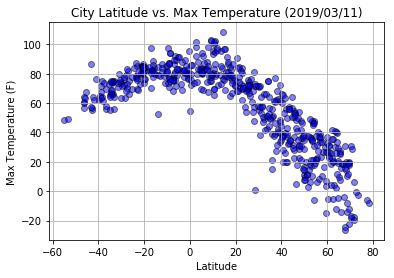

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2019/03/11)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat vs Temp Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

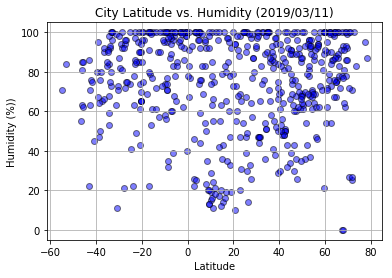

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2019/03/11)")
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat vs Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

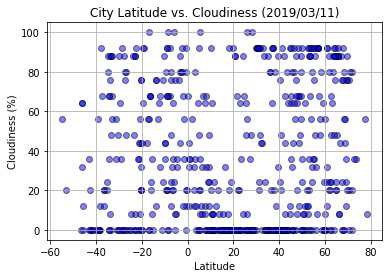

In [19]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2019/03/11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

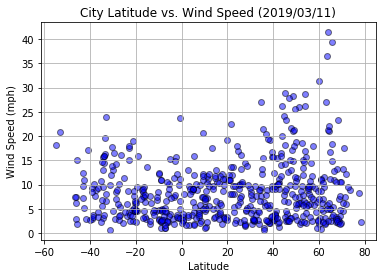

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2019/03/11)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat vs Wind Speed.png")

# Show plot
plt.show()